# Limpando o Dataset do Spotify da Taylor Swift e respondendo as seguintes perguntas:
* Quais músicas e álbuns são os mais populares?
* Como a popularidade das músicas varia ao longo dos anos?
* Há correlação entre características como energia, dançabilidade e popularidade?
* Qual o impacto do tempo de duração na popularidade da música?
* Qual o perfil das músicas mais populares (dançabilidade, energia, valência, etc.)?
* Qual é a variação de popularidade das músicas ao longo dos álbuns?
* Quais são os singles mais populares em cada álbum?

In [2]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importando a base 

taylor = pd.read_csv('taylor_swift_spotify.csv')

In [6]:
# Visualizando a base

taylor.head(3)

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.5020,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,82,228965
1,1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,0.0483,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,79,293048
2,2,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.1370,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,80,203801


In [8]:
# Visualizando o formato do Dataset

taylor.shape

(582, 18)

In [10]:
# Informações da base (tipo de colunas, linhas não nulas, etc)

taylor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        582 non-null    int64  
 1   name              582 non-null    object 
 2   album             582 non-null    object 
 3   release_date      582 non-null    object 
 4   track_number      582 non-null    int64  
 5   id                582 non-null    object 
 6   uri               582 non-null    object 
 7   acousticness      582 non-null    float64
 8   danceability      582 non-null    float64
 9   energy            582 non-null    float64
 10  instrumentalness  582 non-null    float64
 11  liveness          582 non-null    float64
 12  loudness          582 non-null    float64
 13  speechiness       582 non-null    float64
 14  tempo             582 non-null    float64
 15  valence           582 non-null    float64
 16  popularity        582 non-null    int64  
 1

In [12]:
# A Cardinalidade (quantidade de valores em cada uma das colunas)

taylor.nunique()

Unnamed: 0          582
name                363
album                29
release_date         25
track_number         46
id                  582
uri                 582
acousticness        391
danceability        268
energy              332
instrumentalness    213
liveness            269
loudness            425
speechiness         274
tempo               439
valence             308
popularity           65
duration_ms         407
dtype: int64

In [14]:
# Verificar valores ausentes (vazios)

taylor.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [16]:
# Renomeando 

taylor['album'] = taylor['album'].replace({'THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY': 'TTPD: THE ANTHOLOGY'})

taylor['album'] = taylor['album'].replace({'THE TORTURED POETS DEPARTMENT': 'TTPD'})

taylor.head(3)

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Fortnight (feat. Post Malone),TTPD: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.5020,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,82,228965
1,1,The Tortured Poets Department,TTPD: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,0.0483,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,79,293048
2,2,My Boy Only Breaks His Favorite Toys,TTPD: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.1370,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,80,203801


In [18]:
# Resumo estatístico da Base

taylor.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,582.000000,582.00000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,290.500000,11.42268,0.333185,0.580804,0.565832,0.003393,0.161130,-7.661986,0.056475,122.398954,0.391000,57.857388,240011.189003
std,168.153204,8.04206,0.327171,0.114553,0.191102,0.027821,0.136563,2.904653,0.070859,30.408485,0.195829,16.152520,45928.954305
min,0.000000,1.00000,0.000182,0.175000,0.118000,0.000000,0.033500,-17.932000,0.023100,68.097000,0.038400,0.000000,83253.000000
25%,145.250000,5.00000,0.037325,0.515000,0.418000,0.000000,0.096525,-9.400750,0.030300,96.888000,0.230000,45.000000,211823.000000
50%,290.500000,10.00000,0.184500,0.593500,0.571000,0.000002,0.114500,-7.352500,0.037600,119.054500,0.374000,62.000000,235433.000000
75%,435.750000,15.00000,0.660000,0.653000,0.719000,0.000058,0.161000,-5.494750,0.054800,143.937250,0.522500,70.000000,260819.500000
max,581.000000,46.00000,0.971000,0.897000,0.948000,0.333000,0.931000,-1.927000,0.912000,208.918000,0.943000,93.000000,613026.000000


In [20]:
# Elimininando as colunas que não serão relevantes para a análise

taylor = taylor.drop(['Unnamed: 0', 'id', 'uri'], axis=1)

In [22]:
# Verificando se as colunas foram excluídas

taylor.head(3)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Fortnight (feat. Post Malone),TTPD: THE ANTHOLOGY,2024-04-19,1,0.5020,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,82,228965
1,The Tortured Poets Department,TTPD: THE ANTHOLOGY,2024-04-19,2,0.0483,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,79,293048
2,My Boy Only Breaks His Favorite Toys,TTPD: THE ANTHOLOGY,2024-04-19,3,0.1370,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,80,203801


### Vamos para a análise:
  #### Quais músicas e albúns são os mais populares?

In [25]:
# Top 10 músicas mais populares

top_songs = taylor[['name', 'album', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

top_songs

,name,album,popularity
324,Cruel Summer,Lover,93
31,Fortnight (feat. Post Malone),TTPD,91
43,I Can Do It With a Broken Heart,TTPD,88
325,Lover,Lover,86
157,Anti-Hero,Midnights,85
344,Don’t Blame Me,reputation,85
308,cardigan,folklore,84
314,august,folklore,84
39,Guilty as Sin?,TTPD,82
21,So High School,TTPD: THE ANTHOLOGY,82


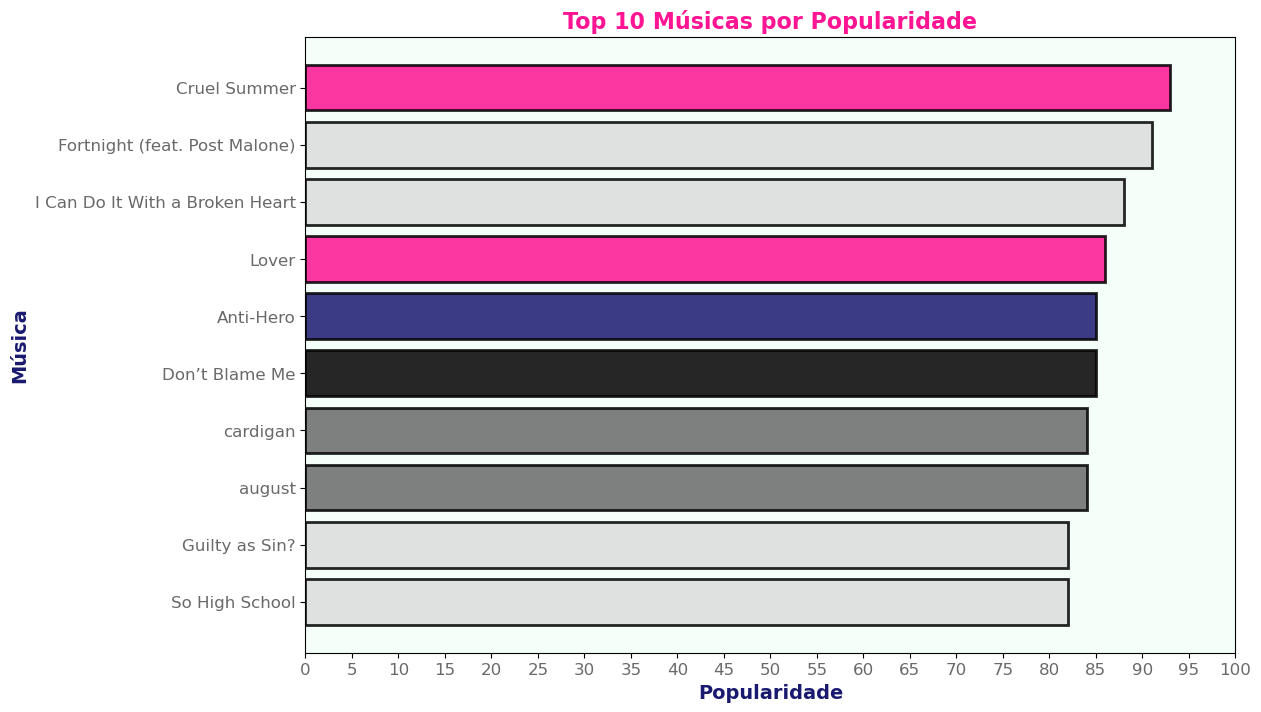

In [274]:
# Visualizando graficamente com efeito de "brilho"
colors = ['deeppink', 'gainsboro', 'gainsboro', 'deeppink', 'midnightblue', 
          'black', 'dimgray', 'dimgray', 'gainsboro', 'gainsboro']

plt.figure(figsize=(12, 8))

# Adicionando bordas e alpha para um efeito visual mais interessante
bars = plt.barh(top_songs['name'], top_songs['popularity'], color=colors, edgecolor='black', linewidth=1.5, alpha=0.9)

# Adicionando um gradiente (sombreamento sutil) para o fundo
plt.gca().set_facecolor('mintcream')  # Fundo do gráfico
plt.gcf().set_facecolor('white')      # Fundo fora do gráfico

# Rótulos e título com estilo aprimorado
plt.xlabel('Popularidade', fontsize=14, color='midnightblue', fontweight='bold')
plt.ylabel('Música', fontsize=14, color='midnightblue', fontweight='bold')
plt.title('Top 10 Músicas por Popularidade', fontsize=16, color='deeppink', fontweight='bold')

# Personalizando os ticks do eixo X
plt.xticks(range(0, 101, 5), fontsize=12, color='dimgray')
plt.yticks(fontsize=12, color='dimgray')
plt.gca().invert_yaxis()  # Inverte o eixo Y

# Adicionando gradiente ou sombra para destacar as barras
for bar in bars:
    bar.set_alpha(0.85)
    bar.set_linewidth(2)
    bar.set_edgecolor('black')

plt.show()

In [271]:
top_albums = taylor.groupby('album')['popularity'].mean().sort_values(ascending=False).head(5)
print(top_albums)

album
TTPD: THE ANTHOLOGY    78.774194
TTPD                   77.000000
Lover                  75.944444
reputation             75.733333
Midnights              74.153846
Name: popularity, dtype: float64


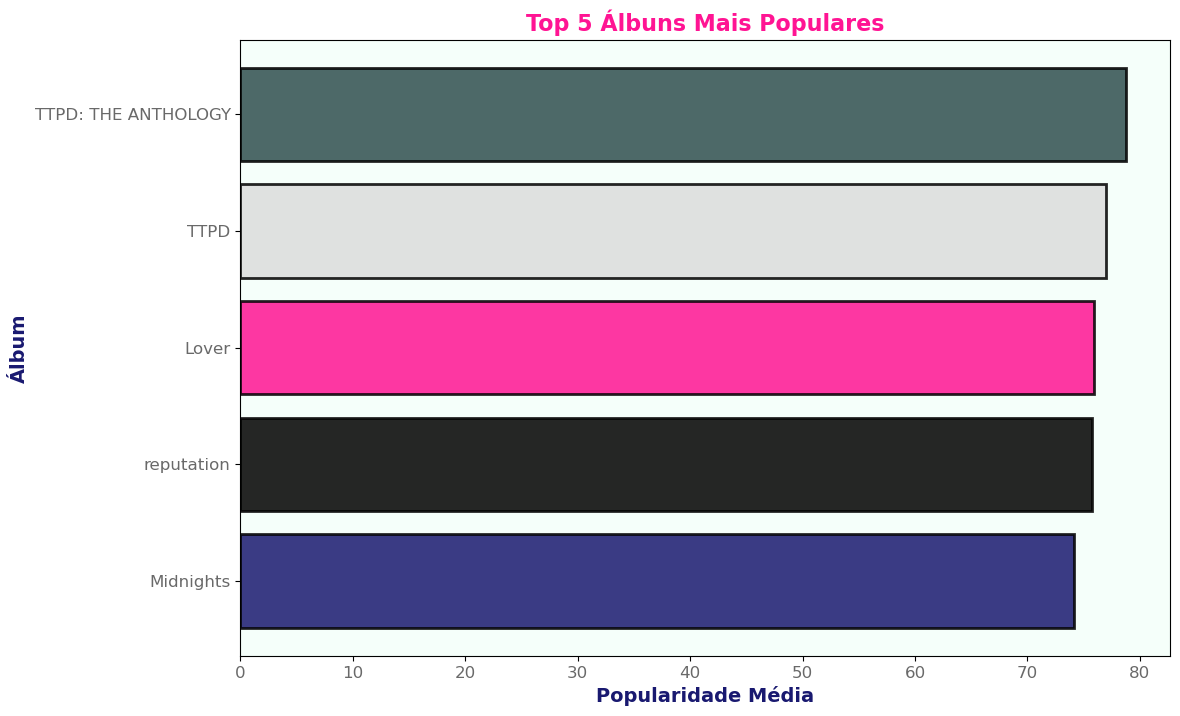

In [276]:
# Visualizando graficamente com destaque
colors = ['darkslategray', 'gainsboro', 'deeppink', 'black', 'midnightblue']

plt.figure(figsize=(12, 8))

# Barras com bordas e transparência
bars = plt.barh(top_albums.index, top_albums.values, color=colors, edgecolor='black', linewidth=1.5, alpha=0.9)

# Estilo do gráfico
plt.xlabel('Popularidade Média', fontsize=14, color='midnightblue', fontweight='bold')
plt.ylabel('Álbum', fontsize=14, color='midnightblue', fontweight='bold')
plt.title('Top 5 Álbuns Mais Populares', fontsize=16, color='deeppink', fontweight='bold')

# Ajustando o fundo
plt.gca().set_facecolor('mintcream')  # Fundo do gráfico
plt.gcf().set_facecolor('white')      # Fundo externo do gráfico

# Personalizando os ticks
plt.xticks(fontsize=12, color='dimgray')
plt.yticks(fontsize=12, color='dimgray')

# Inverte o eixo Y para o mais popular no topo
plt.gca().invert_yaxis()

# Adicionando bordas e brilho nas barras
for bar in bars:
    bar.set_alpha(0.85)
    bar.set_linewidth(2)
    bar.set_edgecolor('black')

plt.show()

#### Interpretação dos resultados

* Top 10 Músicas por Popularidade: Este gráfico mostra quais são as músicas mais populares. A música **"Cruel Summer"** está no topo da lista, seguida por **"Fortnight (feat. Post Malone)"** e **"I Can Do It With a Broken Heart"**, indicando que essas são as músicas mais ouvidas ou preferidas atualmente.

* Top 5 Álbuns Mais Populares: Aqui temos os álbuns mais populares. O álbum **"THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY"** lidera a lista, seguido por **"Lover"** e **"Reputation"**. Isso sugere quais álbuns têm mais acumulação de músicas populares.

### Como a populariodade das músicas varia os longo dos anos?

In [35]:
# Converter a coluna de data para formato de data

taylor['release_date'] = pd.to_datetime(taylor['release_date'], errors='coerce')

In [37]:
# Extrair o ano

taylor['year'] = taylor['release_date'].dt.year

In [39]:
# Contagem de músicas lançadas por ano

songs_per_year = taylor.groupby('year')['name'].count()
print(songs_per_year)

year
2006    15
2008    43
2010    52
2012    38
2014    32
2017    61
2019    18
2020    82
2021    73
2022    33
2023    88
2024    47
Name: name, dtype: int64


In [41]:
# Popularidade média por ano

popularity_per_year = taylor.groupby('year')['popularity'].mean()
print(popularity_per_year)

year
2006    56.666667
2008    36.976744
2010    46.826923
2012    44.973684
2014    50.500000
2017    42.442623
2019    75.944444
2020    60.365854
2021    65.835616
2022    67.303030
2023    66.659091
2024    78.170213
Name: popularity, dtype: float64


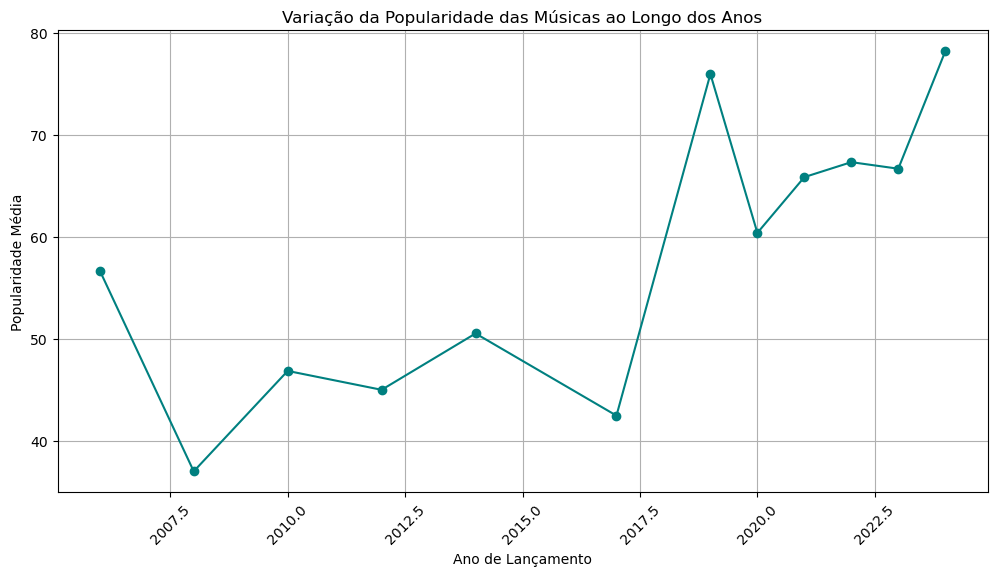

In [43]:
# Visualizando graficamente

plt.figure(figsize=(12, 6))
plt.plot(popularity_per_year.index, popularity_per_year.values, marker='o', color='teal', linestyle='-')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Popularidade Média')
plt.title('Variação da Popularidade das Músicas ao Longo dos Anos')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Interpretação dos Resultados

O gráfico de linha mostra a variação na popularidade média das músicas de Taylor Swift ao longo dos anos. Vamos destacar algumas observações interessantes:

1. **Tendência Geral**: O gráfico demonstra uma tendência geral de aumento na popularidade das músicas com o passar dos anos, com algumas flutuações notáveis.

2. **Pico em 2019**: Há um aumento significativo na popularidade média das músicas lançadas em 2019, indicando um ponto alto na carreira de Taylor Swift nesse período.

3. **Aumento em 2022**: Outro aumento significativo na popularidade média das músicas é observado em 2022, sugerindo que as músicas lançadas recentemente têm sido bem recebidas pelo público.

4. **Flutuações no Meio do Período**: Observa-se algumas variações na popularidade das músicas entre 2007 e 2019, com períodos de aumento e queda.

### Há correlação entre características como energia, dançabilidade e popularidade?

In [48]:
# Verifica a correlação entre as principais variáveis
correlation = taylor[['danceability', 'energy', 'valence', 'speechiness', 'tempo', 'popularity']].corr()

correlation

,danceability,energy,valence,speechiness,tempo,popularity
danceability,1.000000,0.034833,0.303885,0.167959,-0.229525,0.013204
energy,0.034833,1.000000,0.487221,-0.070511,0.175123,-0.111898
valence,0.303885,0.487221,1.000000,0.050848,0.102885,-0.095194
speechiness,0.167959,-0.070511,0.050848,1.000000,0.049339,-0.037221
tempo,-0.229525,0.175123,0.102885,0.049339,1.000000,-0.018183
popularity,0.013204,-0.111898,-0.095194,-0.037221,-0.018183,1.000000


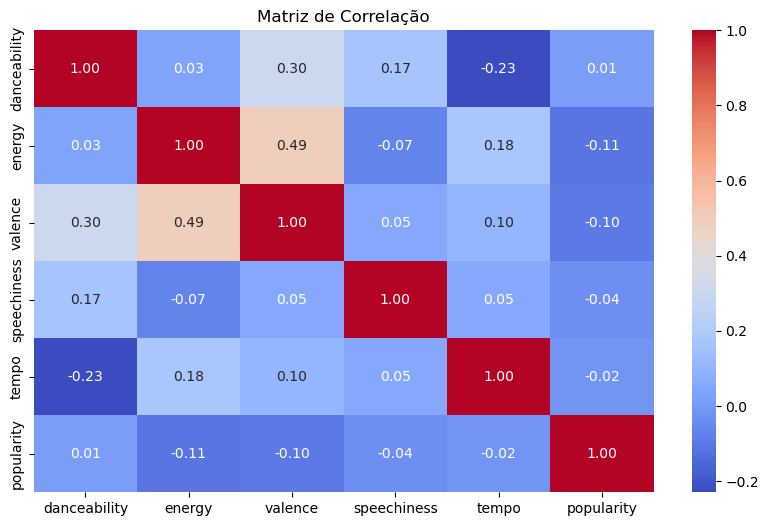

In [50]:
# Visualizando a matriz de correlação

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

### Interpretação dos resultados

- **Não há uma correlação forte entre popularidade e as características musicais analisadas**, indicando que outros fatores podem influenciar o sucesso das músicas.  
- Existe uma relação moderada entre **energia e valência**, o que indica que músicas mais enérgicas tendem a transmitir emoções mais positivas.  
- A dançabilidade tem uma leve relação com valência, sugerindo que músicas mais alegres podem ser mais dançantes.  
- A correlação entre tempo e dançabilidade é levemente negativa, sugerindo que músicas muito rápidas podem não ser tão dançantes. 

#### Qual o impacto do tempo de duração na popularidade da música?

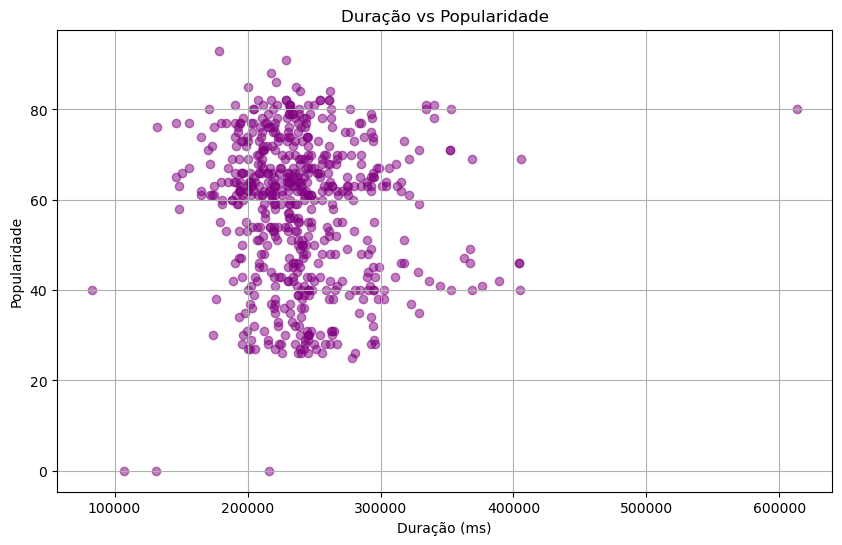

In [54]:
# Criando um gráfico de dispersão entre duração e popularidade

plt.figure(figsize=(10,6))
plt.scatter(taylor['duration_ms'], taylor['popularity'], alpha=0.5, color='purple')
plt.title('Duração vs Popularidade')
plt.xlabel('Duração (ms)')
plt.ylabel('Popularidade')
plt.grid(True)
plt.show()

In [58]:
# Verificar correlação entre duração e popularidade

correlation_duration_popularity = taylor[['duration_ms', 'popularity']].corr()
print(correlation_duration_popularity)

             duration_ms  popularity
duration_ms     1.000000   -0.062182
popularity     -0.062182    1.000000


### Interpretação dos resultados

- A duração das músicas parece não influenciar diretamente na popularidade, pois a correlação encontrada é próxima de zero.
- A popularidade das músicas provavelmente depende de outros fatores, como gênero, marketing, engajamento do público e tendências atuais.
- O gráfico confirma a análise da correlação, mostrando uma distribuição dispersa e sem uma tendência clara.

### Qual o perfil das músicas mais populares (dançabilidade, energia, valência, etc.)?

In [90]:


top_popular_songs = taylor[taylor['popularity'] >= taylor['popularity'].quantile(0.80)]

In [96]:
# Calculando a média

popular_songs_profile = top_popular_songs[['danceability', 'energy', 'valence', 'speechiness']].mean()
print(popular_songs_profile)

danceability    0.588508
energy          0.543373
valence         0.368786
speechiness     0.065936
dtype: float64


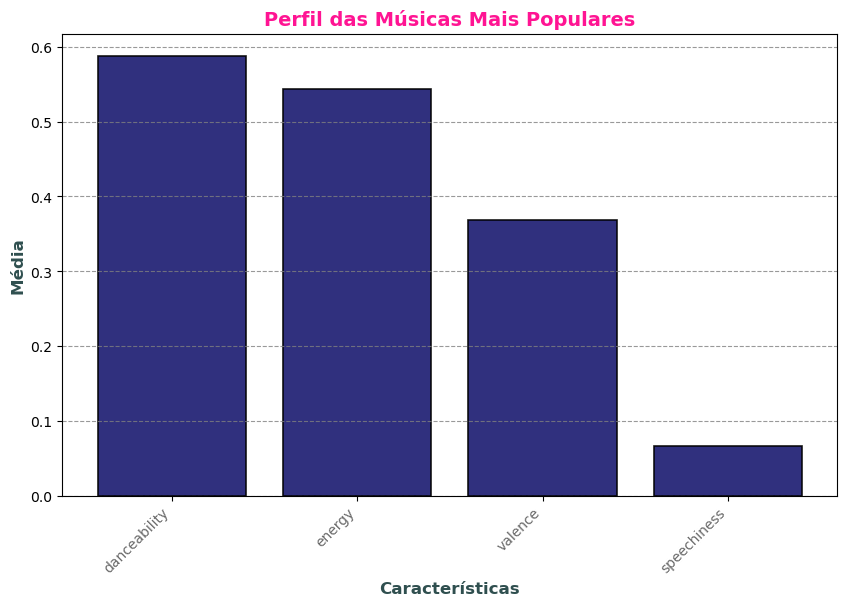

In [288]:
# Visualizando graficamente

plt.figure(figsize=(10, 6))

# Barras com bordas e leve transparência para destaque
plt.bar(
    popular_songs_profile.index,
    popular_songs_profile.values,
    color='midnightblue',
    edgecolor='black',  
    linewidth=1.2,      
    alpha=0.9           
)

plt.xlabel('Características', fontsize=12, color='darkslategray', fontweight='bold')
plt.ylabel('Média', fontsize=12, color='darkslategray', fontweight='bold')
plt.title('Perfil das Músicas Mais Populares', fontsize=14, color='deeppink', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, color='dimgray')
plt.grid(axis='y', linestyle='--', alpha=0.8, color='gray')

plt.show()

### Interpretação do resultado:
O perfil das músicas mais populares indica que elas possuem uma dançabilidade e energia moderadas, com uma valência mais baixa (ou seja, são menos alegres e mais emocionais), têm um foco maior em melodia do que em palavras faladas e possuem um tempo médio de 123 BPM, ideal para músicas que são cativantes, mas não excessivamente rápidas ou lentas.

### Qual é a variação de popularidade das músicas ao longo dos álbuns?

In [70]:
# Agrupando por álbum e calcular a média de popularidade

album_popularity = taylor.groupby('album')['popularity'].mean().sort_values(ascending=True)

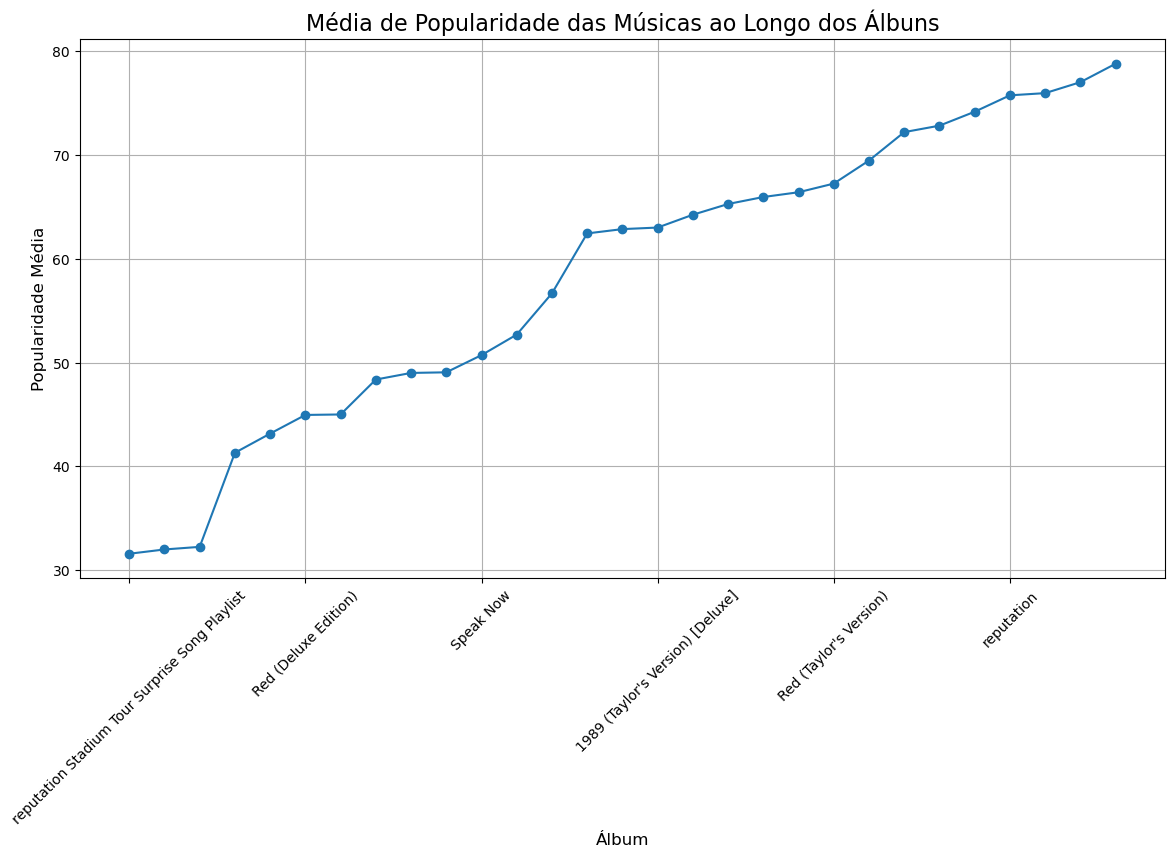

In [72]:
# Visualizando graficamente

plt.figure(figsize=(14, 7))
album_popularity.plot(kind='line', marker='o', linestyle='-')
plt.title('Média de Popularidade das Músicas ao Longo dos Álbuns', fontsize=16)
plt.xlabel('Álbum', fontsize=12)
plt.ylabel('Popularidade Média', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Interpretação dos Resultados

O gráfico de linha mostra a variação na popularidade média das músicas de Taylor Swift ao longo dos álbuns. Vamos destacar algumas observações interessantes:

1. **Tendência Geral**: O gráfico apresenta uma tendência clara de aumento na popularidade média ao longo dos álbuns. Isso sugere que, com o tempo, as músicas de Taylor Swift têm se tornado mais populares.

2. **Álbum "Reputation Stadium Tour Surprise Song Playlist"**: Este álbum tem a menor popularidade média entre os álbuns exibidos no gráfico. 

3. **Álbum "Red (Deluxe Edition)"**: Houve um aumento significativo na popularidade média das músicas neste álbum.

4. **Álbum "Speak Now"**: Apresenta uma popularidade média mais alta em comparação com os álbuns anteriores.

5. **Álbum "1989 (Taylor's Version) [Deluxe]"**: A popularidade média das músicas aumenta ainda mais neste álbum, indicando um ponto alto na carreira da Taylor Swift.

6. **Álbum "Red (Taylor's Version)"**: A popularidade média das músicas mantém a tendência de alto nível.

7. **Álbum "reputation"**: Este álbum tem uma das mais altas popularidades médias, mostrando a ampla aceitação que teve dentre os fãs.

No geral, esses resultados sugerem que a popularidade das músicas de Taylor Swift tem aumentado consistentemente ao longo do tempo, com alguns álbuns que se destacam mais do que outros em termos de popularidade.

### Quais são os singles mais populares em cada álbum?

In [76]:
# Encontrando os singles mais populares de cada álbum

most_popular_singles = taylor.loc[taylor.groupby('album')['popularity'].idxmax()]

In [78]:
# Exibindo os resultados

print(most_popular_singles[['album', 'name', 'popularity']])

                                                 album  \
429                                               1989   
403                                      1989 (Deluxe)   
70                             1989 (Taylor's Version)   
68                    1989 (Taylor's Version) [Deluxe]   
545                   Fearless (International Version)   
535                        Fearless (Platinum Edition)   
203                        Fearless (Taylor's Version)   
561              Live From Clear Channel Stripped 2008   
324                                              Lover   
157                                          Midnights   
148                            Midnights (3am Edition)   
133                   Midnights (The Til Dawn Edition)   
459                                                Red   
437                               Red (Deluxe Edition)   
197                             Red (Taylor's Version)   
496                                          Speak Now   
510           

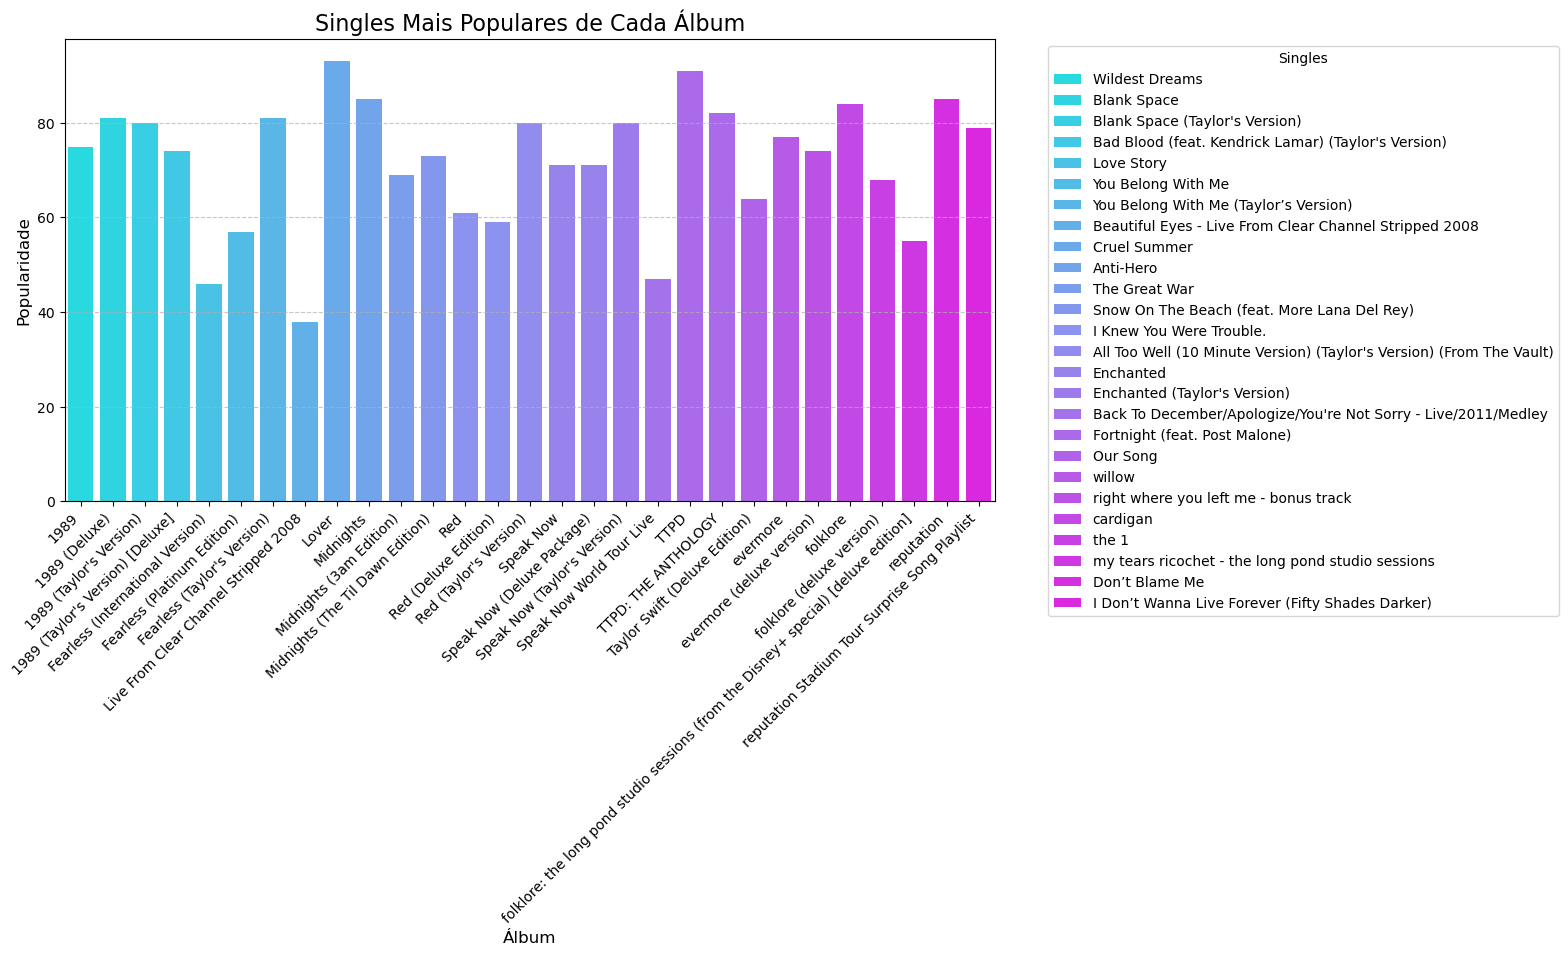

In [86]:
# Visualizando graficamente

plt.figure(figsize=(12, 6))
sns.barplot(data=most_popular_singles, x='album', y='popularity', hue='name', dodge=False, palette='cool')
plt.title('Singles Mais Populares de Cada Álbum', fontsize=16)
plt.xlabel('Álbum', fontsize=12)
plt.ylabel('Popularidade', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Singles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interpetação do resultado

1. **Álbum "Midnights"**: Este álbum parece ser um dos mais populares, com altas médias de popularidade em muitas músicas. Isso sugere que as músicas desse álbum ressoaram bastante com o público.

2. **Álbum "1989"**: Outro álbum com uma alta popularidade média. Isso é interessante porque é um álbum que marcou uma nova fase na carreira da Taylor, com uma pegada mais pop.

3. **Álbum "reputation"**: Este álbum parece ter uma variação maior na popularidade das músicas. Algumas músicas são extremamente populares, enquanto outras têm uma popularidade mais moderada.

4. **Álbuns "folklore" e "Lover"**: Ambos os álbuns têm médias de popularidade relativamente altas, mas menos consistentes do que "Midnights" e "1989".

5. **Álbuns mais antigos como "Speak Now" e "Red"**: Mostram uma variação maior na popularidade das músicas, mas ainda têm alguns singles bastante populares.